# Machine Learning with scikit-learn

![machinelearning](images/machineLearning.png)


First, here is the code to install the scikit learn package with conda in the terminal

`conda create -n sklearn-env -c conda-forge scikit-learn`

`conda activate sklearn-env`

Alternative installation for students:
- Open Anaconda
- go to environments, select EDS217
- pulldown from 'installed' to 'not installed'
- select "scikit-learn" and apply!


"Scikit-learn is a popular and robust machine learning library that has a vast assortment of algorithms, as well as tools for <b>ML visualizations, preprocessing, model fitting, selection, and evaluation</b>. Building on <b>NumPy</b>, <b>SciPy</b>, and <b>matplotlib</b>, Scikit-learn features a number of efficient algorithms for classification, regression, and clustering. These include support vector machines, rain forests, gradient boosting, k-means, and DBSCAN. " - https://www.nvidia.com/en-us/glossary/data-science/scikit-learn/

![cutemachinelearningimage](images/how-to.png)



### This library provides tools to walk through each step of machine learning! 

- <i>Preprocessing</i>:  To extract and normalize data.
- <i>Classification</i>:  To identify which category an object belongs.
- <i>Regression</i>:  The creation of a model to understand relationship between input and output data.
- <i>Clustering</i>:  Data is auto-grouped with similar characteristics into sets. (sklearn.cluster module has a wide variety of options for data clustering)
- <i>Dimensionality reduction</i>:  The number of random outlier variables are reduced for analysis.
- <i>Model selection</i>:  A variety of models that compare, validate, and select optimal parameters.
- <i>Pipeline</i>:  Easily build a model by passing data through transformers (extract the features) then an estimator (trains/firts data to build model).
- <i>Visualizations</i>:  Setup for quick plotting and visual adjustments.

![intro](images/training.png)
### A handful of useful models that we can do in scikit learn:

<b><u>Supervised Models</b></u>: Use of labeled datasets to train algorithms
<br><b>Linear modeling/Regression</b>: typically used to make preditions about fuuture outcomes, identifies relationship between dependent variable and one or more independent variables.
<br><b>Nearest Neighbors</b>: "KNN" classifies data point category on the proximity to other available plotted data.
<br><b>Bayesian</b>: Regression to include regularization parameters in the estimation procedure, using probability distributions rather than point estimates.
<br><b>Decision Trees</b>: used for classification and regression, creates a model to predict target value by learning simple decision rules inferred from data features (ie 'Random Forest').
<br><b>Semi-Supervised</b>: Only part of the input data has been labeled.
<br><b>Supervised Neural Networks</b>: for deep learning, mimics interconnectivity of human brain through layers of nodes. Nodes made up of inputs, weights, and output "fire" if output value exceeds a given threshold. Can be supervised or unsupervised.
<br>
<br><b><u>Unsupervised</b></u>: Uses unlabeled data to discover patterns to solve for clustering or association problems.
<br><b>Clustering</b>: formula learns to cluster data, returning an array of interger labels corresponding to the different clusters
<br><b>Manifold Learning</b>: approach to non-linear dimensionality reduction, algorithms assume dimensionality of many data sets are only artificially high.
<br><b>Density Estimation</b>: simplest concept is the histogram!
<br><b>Unsupervised Neural Networks</b>: based on a probabilistic model, makes assumptions regarding the distribution of inputs
 
 -https://scikit-learn.org/stable/user_guide.html
 
![cat_goals](images/cat_goals.png)



## Let's walk through an example!


First, lets install sklearn and import our libraries


In [98]:

##Import our important libraries


#Data processing
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Machine Learning
from sklearn import datasets

We have 4 feature variables (`petal length (cm)`, `petal width (cm)`, `sepal length(cm)`, `sepal width (cm)`) - these are what we'll use to make our predictions

Our target variable is species. There are three different species: Versicolor, Virginica, and Setosa


Our goal is to use our feature variables, the 4 flower measurements, to predict the target variable, what species the flower is.


We're going to use a KNN Classifier, but lets check out the data first. Note that since it is part of sklearn's built in datasets, its a little different than a pandas dataframe

['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


<AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>

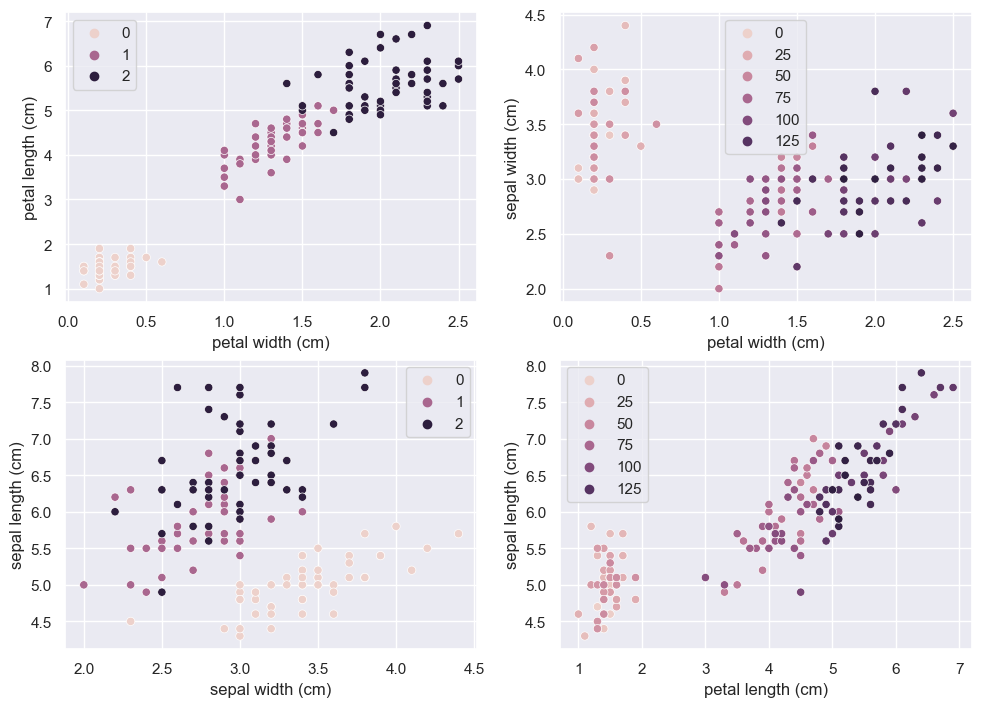

In [99]:
#Explore data 
iris = datasets.load_iris()

#Here are the different species
print(iris['target_names'])

#We can see that our data and target are both stored as numpy arrays
print(type(iris['data'])) 
print(type(iris['target']))

#data and target must have the same number of observations(rows)
print(iris['data'].shape)
print(iris['target'].shape)

#Converting stuff to a dataframe so we can visually explore it
X = iris['data']
y = iris['target']

iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df = pd.DataFrame(X, y, columns = iris['feature_names'])

petals = df[['petal length (cm)', 'petal width (cm)']]
sepals = df[['sepal length (cm)', 'sepal width (cm)']]

fig, ax = plt.subplots(2, 2)
sns.scatterplot(ax = ax[0, 0], data = petals, x = 'petal width (cm)', y = 'petal length (cm)', hue = petals.index)
sns.scatterplot(ax = ax[1, 0], data = sepals, x = 'sepal width (cm)', y = 'sepal length (cm)', hue = sepals.index)
sns.scatterplot(ax = ax[1, 1], data = iris_df, x = 'petal length (cm)', y = 'sepal length (cm)', hue = iris_df.index)
sns.scatterplot(ax = ax[0, 1], data = iris_df, x = 'petal width (cm)', y = 'sepal width (cm)', hue = iris_df.index)


In [100]:
#lets try a KNN classifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsTransformer



#instantiate knn classifier object
knn = KNeighborsClassifier(n_neighbors=6)

# Pass 2 arguments to the fit method, features as a np.array and targets as an np.array. 
knn.fit(X, y)

#lets try a prediction
prediction = knn.predict(np.array([[5, 3.4, 1.3, 1], [5.1, 3.3, 1.2, 0.9], [4.6, 3.5, 1.4, 1.2], [7, 3, 5, 2], [5, 4, 6, 2.3]]))


#Using a lookup table to convert the array values to its corresponding species

species_lut = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

species_char = [species_lut.get(i, None) for i in prediction]
print(species_char)

['setosa', 'setosa', 'setosa', 'virginica', 'virginica']


This is all well and good for our random data points selected, but what if we want to see how accurate our model is? We can't use the observations that we trained our data on, because the model already knows what they are.


Fortunately, scikitlearn has a module for this.

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 15) 

We're passing five arguments to the `train_test_split` function. 





1. First, we pass the feature data - what we saved as X in our processing step (`X = iris['data']`). 

2. Second, we pass the target data that we want to train our model on (which we also did above - `y = iris['target']`)

3. Third, we're telling the function how much of our data we want to train the model on. If not specified, the test_size keyword argument defaults to training the model on 75% of the original data, and testing on the remaining 25%. Here, we are training our model on 66% of our original data. So 99 of our 150 observations will be used to train the model, while 51 observations will be used to test our model to evaluate its accuracy. This is specified by the test_size argument. 



4. Fourth, we're telling the model that we want to preserve the proportion that the target variables appear in the original data. We wouldn't want our model trained on 50 versicolor observations, while only being trained on 35 virginica observations and 14 setosa observations. We want to stratify on our target variable, `y`, so that we train on 33 observations of each species. This ensures we're not overtraining or undertraining on any of the targets.



5. Finally, the random state generator reproducibly randomizes the observations trained and tested on. As far as we can tell, the integer passed as an argument is arbitrary. If we want someone else to reproduce our work, we just get them to choose the same random seed as we did - so that the data is 'randomized' in the same way.




The `train_test_split` function returns four arrays: our feature data that we're _training_ our model on - which we have unpacked and saved as `X_train`, our feature data that we're _testing_ on, `X_test`, our target data that we're _training_ on, `y_train`, and our target data that we're _testing_ on, `y_test`.

In [102]:
print('Head of our feature training set : X_train -', X_train[0:5])

print('Head of our feature testing set : X_test -', X_test[0:5])

print('Our target training set : y_train -', y_train)

print('Our target testing set : y_test -', y_test)


Head of our feature training set : X_train - [[5.3 3.7 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.8 2.7 5.1 1.9]
 [4.5 2.3 1.3 0.3]
 [5.4 3.  4.5 1.5]]
Head of our feature testing set : X_test - [[5.2 3.5 1.5 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.5 0.3]
 [6.8 3.2 5.9 2.3]]
Our target training set : y_train - [0 2 2 0 1 0 0 2 2 2 1 1 1 0 1 2 2 2 1 1 0 1 1 1 1 0 2 1 0 1 2 2 2 0 0 0 0
 0 2 0 2 2 0 2 2 1 0 1 0 1 0 0 1 0 0 2 1 0 2 1 0 2 0 0 0 1 0 1 1 2 1 1 1 0
 2 2 2 2 1 1 1 0 2 2 2 1 1 1 2 0 1 2 2 2 0 0 1 2 0 2]
Our target testing set : y_test - [0 2 2 0 2 0 1 1 0 2 2 2 0 0 0 0 0 1 1 1 0 2 2 1 1 1 0 2 1 2 1 0 1 2 0 2 0
 1 1 2 0 2 2 1 1 0 1 1 0 2]


In [103]:
knn_2 = KNeighborsClassifier(n_neighbors=4) # instantiate classifier

knn_2.fit(X_train, y_train) # Fit to training data

y_pred_2 = knn_2.predict(X_test) #predict species based off of our testing data 

print(y_pred_2)

knn_2.score(X_test, y_test) #See how we did


[0 2 2 0 2 0 1 1 0 2 1 2 0 0 0 0 0 1 1 1 0 2 2 2 1 1 0 2 1 2 1 0 1 2 0 2 0
 1 1 1 0 2 2 1 1 0 1 1 0 2]


0.94

## Linear Regression!

In [104]:
%matplotlib inline

#Data processing
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning/load dataset
from sklearn.datasets import load_boston

housing_data = load_boston()

%%hide output

/Users/andrewbartnik/opt/anaconda3/envs/eds-217/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

In [105]:
boston = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


/Users/andrewbartnik/opt/anaconda3/envs/eds-217/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


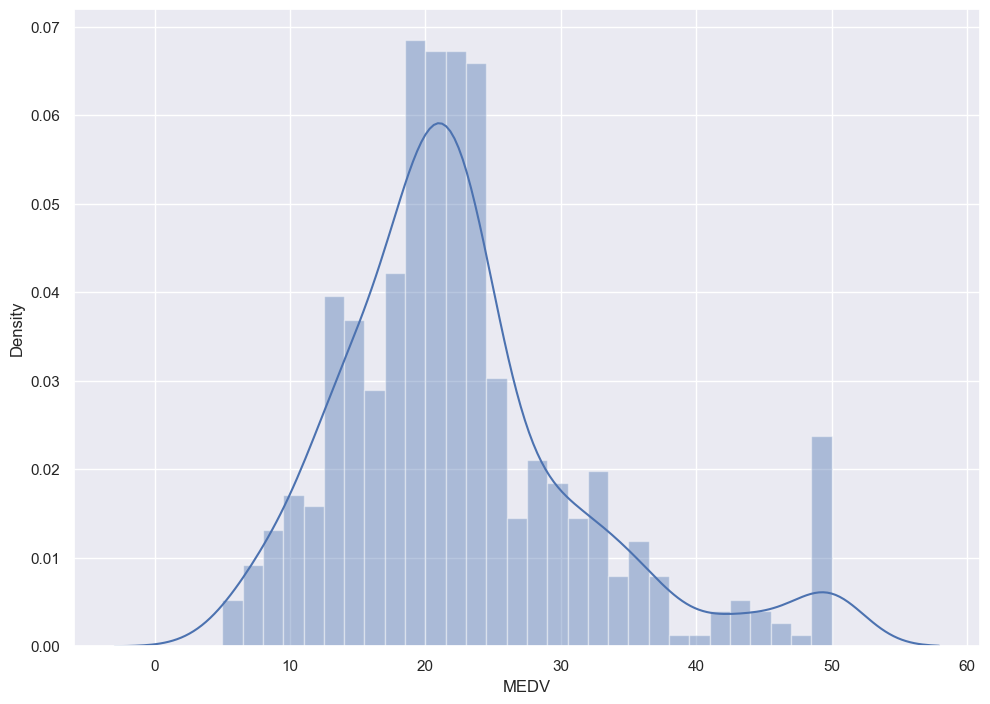

In [106]:
#MEDV was missing...add to dataframe
boston['MEDV'] = housing_data.target

#Count number of missing values
boston.isnull().sum() #no missing values

#plot distribution of target variable MEDV
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show() #normal distribution with few outliers

<AxesSubplot:>

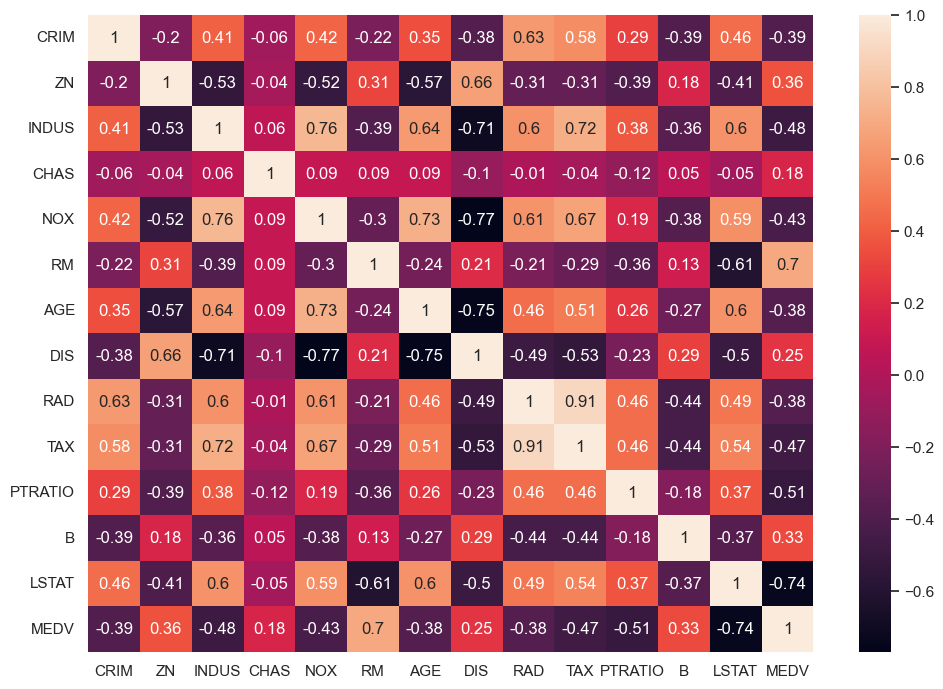

In [107]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

Select features with high correlation with target variable MEDV from heatmap
- MEDV: Median value of owner-occupied homes in $1000's
- LSTAT: % lower status of the population
- RM: average number of rooms per dwelling

https://scikit-learn.org/stable/datasets/toy_dataset.html

Visualize correlation with scatterplot

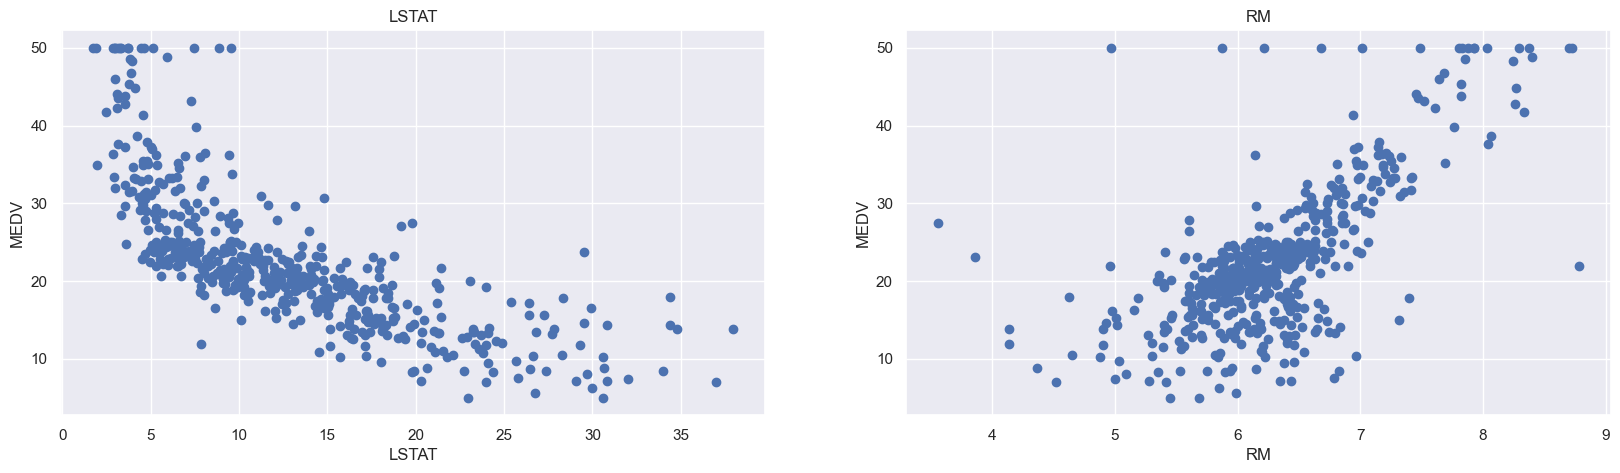

In [108]:
#see how features vary with MEDV
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Prepare data -- split into training & testing sets

In [109]:
#Prepare data from training the model
X1 = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y1 = boston['MEDV']

#split data
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=5)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)
#print to verify if splitting has occurred properly

(404, 2)
(102, 2)
(404,)
(102,)


Train and test the model

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X1_train, Y1_train)

LinearRegression()

Evaluate model

In [111]:
from sklearn.metrics import r2_score
#Use RMSE and R2-score to evaluate model for testing set

y_test_predict = lin_model.predict(X1_test)
rmse = (np.sqrt(mean_squared_error(Y1_test, y_test_predict)))
r2 = r2_score(Y1_test, y_test_predict)

print(rmse)
print(r2)

5.137400784702911
0.6628996975186952
